In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import KFold

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!fc-list :lang=ko

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (18.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and dir

In [4]:
# 총 데이터
main_df = pd.read_excel('/content/drive/MyDrive/파이썬 KDT 시즌1/8. 머신러닝과 딥러닝/머신러닝/데이터 셋/완성본_v1(한류현황지수, 한류심리지수, 유가, 환율, 직선거리, 수입액,수출액,행복지수) 데이터 수정.xlsx')

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가         1512 non-null   object 
 1   날짜         1512 non-null   int64  
 2   관광인원       1512 non-null   int64  
 3   20세 이하     1512 non-null   int64  
 4   21~30세     1512 non-null   int64  
 5   31~40세     1512 non-null   int64  
 6   41~50세     1512 non-null   int64  
 7   51~60세     1512 non-null   int64  
 8   61세이상      1512 non-null   int64  
 9   승무원        1512 non-null   int64  
 10  전체인원       1512 non-null   int64  
 11  score_1    1512 non-null   float64
 12  score_2    1512 non-null   float64
 13  Oil_Price  1512 non-null   float64
 14  월평균 매매기준율  1512 non-null   float64
 15  직선거리(km)   1512 non-null   int64  
 16  행복지수       1512 non-null   float64
dtypes: float64(5), int64(11), object(1)
memory usage: 200.9+ KB


In [6]:
main_df['관광인원비율'] = main_df['관광인원'] / main_df['전체인원']

In [7]:
# d2는 학습데이터로 사용할 컬럼들
# df_one_hot은 원 핫 인코딩 한 것
df2 = main_df[['날짜','국가','관광인원','score_1','score_2','Oil_Price','월평균 매매기준율','직선거리(km)','행복지수','관광인원비율']]
#df_one_hot = pd.get_dummies(df2,columns=['국가'])
#df_one_hot
df2_without_country = df2.drop('국가', axis=1)
X = df2_without_country.drop('관광인원', axis=1)
y = df2_without_country['관광인원']

In [11]:
df2_without_country.to_csv('0630.csv')

In [ ]:
#LGBM은 컬럼에 []들어가면 에러뜸 그래서 처리
#df_one_hot = df_one_hot.rename(columns={'수출액[천달러]':'수출액','수입액[천달러]':'수입액'})

In [12]:
#학습데이터 검증데이터 만들기 (총 1500개여서 테스트사이즈 0.1로잡음)
X_train, X_test, y_train, y_test = train_test_split(df2_without_country.drop(['관광인원','관광인원비율'],axis=1), df2_without_country['관광인원'], test_size=0.1, random_state=10)

In [13]:
df2_without_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         1512 non-null   int64  
 1   관광인원       1512 non-null   int64  
 2   score_1    1512 non-null   float64
 3   score_2    1512 non-null   float64
 4   Oil_Price  1512 non-null   float64
 5   월평균 매매기준율  1512 non-null   float64
 6   직선거리(km)   1512 non-null   int64  
 7   행복지수       1512 non-null   float64
 8   관광인원비율     1512 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 106.4 KB


Text(0.5, 1.0, 'Actual vs Predicted Tourist Numbers')

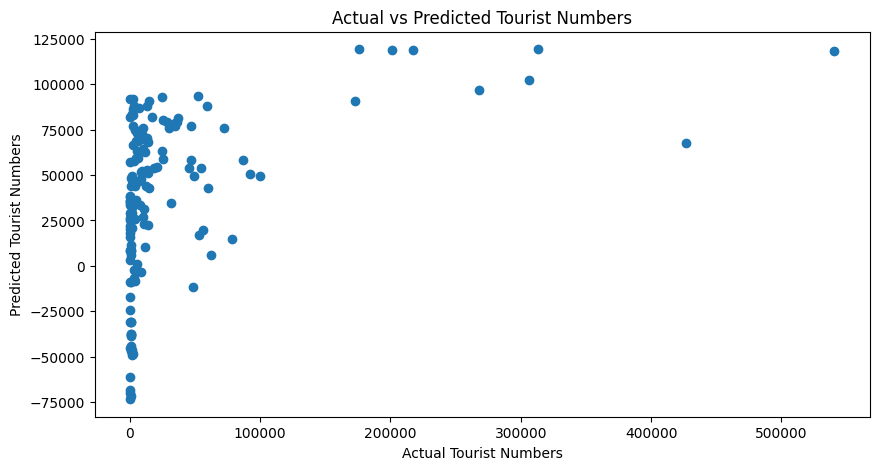

In [14]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 초기화
lr = LinearRegression()

# 모델 훈련
lr.fit(X_train, y_train)

# 예측 수행
predictions = lr.predict(X_test)

# 성능 측정
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test,predictions, squared=False)
# 그래프 그리기
plt.figure(figsize=(10,5))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Tourist Numbers")
plt.ylabel("Predicted Tourist Numbers")
plt.title("Actual vs Predicted Tourist Numbers")


In [15]:
print("RMSE:", rmse)

# 관광인원 예측
tourist_predictions = lr.predict(X_test)

# 예측 결과 출력
test1 = lr.predict(X_test.loc[[146]])
print(f"예측 관광객 수: {test1}")

RMSE: 69592.86769733185
예측 관광객 수: [68690.53414168]


# 결정 트리

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor 모델 생성
dt_regressor = DecisionTreeRegressor(random_state=10)

# 모델 학습
dt_regressor.fit(X_train, y_train)

# 예측
test2 = dt_regressor.predict(X_test.loc[[146]])

# 예측값 출력
print(f"예측 관광객 수: {test2}")



예측 관광객 수: [6057.]


In [17]:
# 예측값
print(f"예측 관광객 수: {test2[0]}")

# 실제값
actual_value = y_test.loc[146]
print(f"실제 관광객 수: {actual_value}")

# 오차 계산
error = abs(test2[0] - actual_value)
print(f"오차: {error}")

예측 관광객 수: 6057.0
실제 관광객 수: 4889
오차: 1168.0


In [18]:
# 전체 테스트 데이터에 대한 예측
y_pred = dt_regressor.predict(X_test)

# RMSE 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 16880.57263815731


# 랜덤 포레스트

In [19]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 생성
rf_regressor = RandomForestRegressor(random_state=10)

# 모델 학습
rf_regressor.fit(X_train, y_train)

# 예측
test3 = rf_regressor.predict(X_test.loc[[146]])

# 예측값 출력
print(f"예측 관광객 수: {test3}")

예측 관광객 수: [5514.75]


In [20]:
# 전체 테스트 데이터에 대한 예측
y_pred = rf_regressor.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 173094512.10157767, RMSE: 13156.53875841126


#Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor 모델 생성
gb_regressor = GradientBoostingRegressor(random_state=10)

# 모델 학습
gb_regressor.fit(X_train, y_train)

# 예측
y_pred_gb = gb_regressor.predict(X_test.loc[[146]])

# 예측값 출력
print(f"예측 관광객 수: {y_pred_gb}")

# RMSE 계산
mse_gb = mean_squared_error(y_test, gb_regressor.predict(X_test))
rmse_gb = np.sqrt(mse_gb)
print(f"RMSE: {rmse_gb}")


예측 관광객 수: [4292.71560918]
RMSE: 16101.719627892659


# XGBOOST

In [22]:
import xgboost as xgb

# XGBoost 모델 생성
xgb_regressor = xgb.XGBRegressor(random_state=10)

# 모델 학습
xgb_regressor.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_regressor.predict(X_test.loc[[146]])

# 예측값 출력
print(f"예측 관광객 수: {y_pred_xgb}")

# RMSE 계산
mse_xgb = mean_squared_error(y_test, xgb_regressor.predict(X_test))
rmse_xgb = np.sqrt(mse_xgb)
print(f"RMSE: {rmse_xgb}")

예측 관광객 수: [5874.4893]
RMSE: 10629.332941028837


#LightGBM

In [23]:
import lightgbm as lgb

# LightGBM 모델 생성
lgb_regressor = lgb.LGBMRegressor(random_state=10)

# 모델 학습
lgb_regressor.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_regressor.predict(X_test.loc[[146]])

# 예측값 출력
print(f"예측 관광객 수: {y_pred_lgb}")

# RMSE 계산
mse_lgb = mean_squared_error(y_test, lgb_regressor.predict(X_test))
rmse_lgb = np.sqrt(mse_lgb)
print(f"RMSE: {rmse_lgb}")

예측 관광객 수: [5135.43716508]
RMSE: 13740.933528586465


#XGBOOST모델이 가장 작은 오차율을 보여주었다.

> 따라서 최적의 하이퍼 파라미터를 적용해보겠습니다

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# XGBoost 모델 초기화
xgb = XGBRegressor()

# 하이퍼파라미터 범위 설정
param_dist = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_leaf_nodes': [20,25,31,35,40],
    'max_iter': [50, 70, 90,100,110,130],
    'learning_rate':[0.1,0.2,0.3,0.4,0.01,0.003]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=151,
    scoring='neg_mean_squared_error',  # MSE를 최소화하도록 설정
    cv=5,
    n_jobs=-1,
    verbose=1,  # 학습 과정 표시
    random_state=42)

# RandomizedSearchCV를 이용한 하이퍼파라미터 튜닝
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합 출력
print(f"최적의 하이퍼파라미터: {random_search.best_params_}")



Fitting 5 folds for each of 151 candidates, totalling 755 fits
[07:20:31] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter", "max_leaf_nodes", "min_samples_split" } are not used.

최적의 하이퍼파라미터: {'min_samples_split': 7, 'max_leaf_nodes': 31, 'max_iter': 130, 'max_depth': 4, 'learning_rate': 0.1}


In [25]:
# 최적의 하이퍼파라미터로 훈련된 모델 가져오기
best_xgb = random_search.best_estimator_


y_pred = best_xgb.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

y_pred_xgb = xgb_regressor.predict(X_test.loc[[146,339,1356,1315,1447,145,666,1203,1218]])
print(f'예상 관광객 수 : {y_pred_xgb} 명')

RMSE: 14647.589340699567
예상 관광객 수 : [ 5874.4893    579.3509    827.20654  1439.4402   5601.127    2458.3684
 17998.736     243.12308   508.1697 ] 명


In [26]:
main_df.loc[1356]

국가                 중국
날짜             202201
관광인원             1641
20세 이하            136
21~30세            883
31~40세           1433
41~50세            777
51~60세            982
61세이상             506
승무원              4772
전체인원             9489
score_1          3.43
score_2        126.48
Oil_Price       83.47
월평균 매매기준율      187.75
직선거리(km)         2118
행복지수            5.818
관광인원비율       0.172937
Name: 1356, dtype: object

In [28]:
#실제 146번 인덱스의 관광객 확인해보기
df2_without_country.loc[146,'관광인원']

4889

In [29]:
#피쳐 중요도
importances=xgb_regressor.feature_importances_
importances

top10 = pd.DataFrame({
    'features': X_train.columns,
    'importance':importances})

top10

,features,importance
0,날짜,0.010422
1,score_1,0.061538
2,score_2,0.005316
3,Oil_Price,0.002816
4,월평균 매매기준율,0.002630
5,직선거리(km),0.460434
6,행복지수,0.456843


<Axes: xlabel='importance', ylabel='features'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  func(*

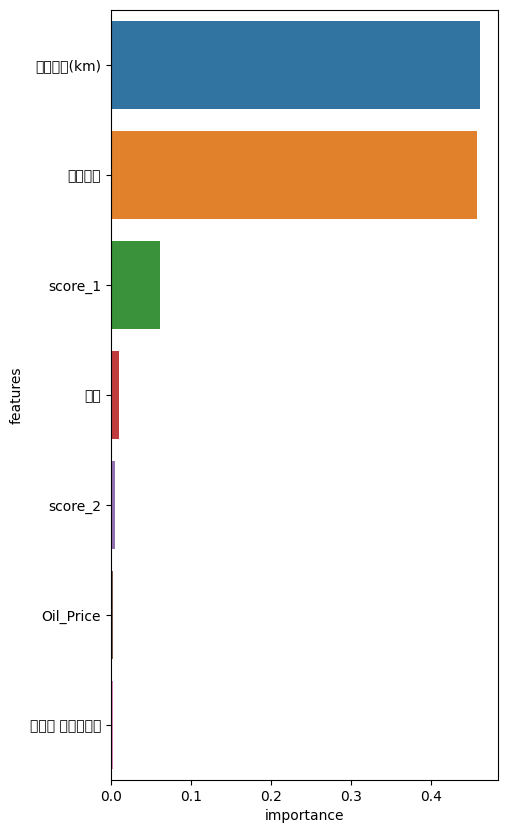

In [30]:
plt.figure(figsize=(5,10))
sns.barplot(x='importance',y='features', data=top10.sort_values('importance',ascending=False))

<ipython-input-31-1224fc2540ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main_df.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packag

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*ar

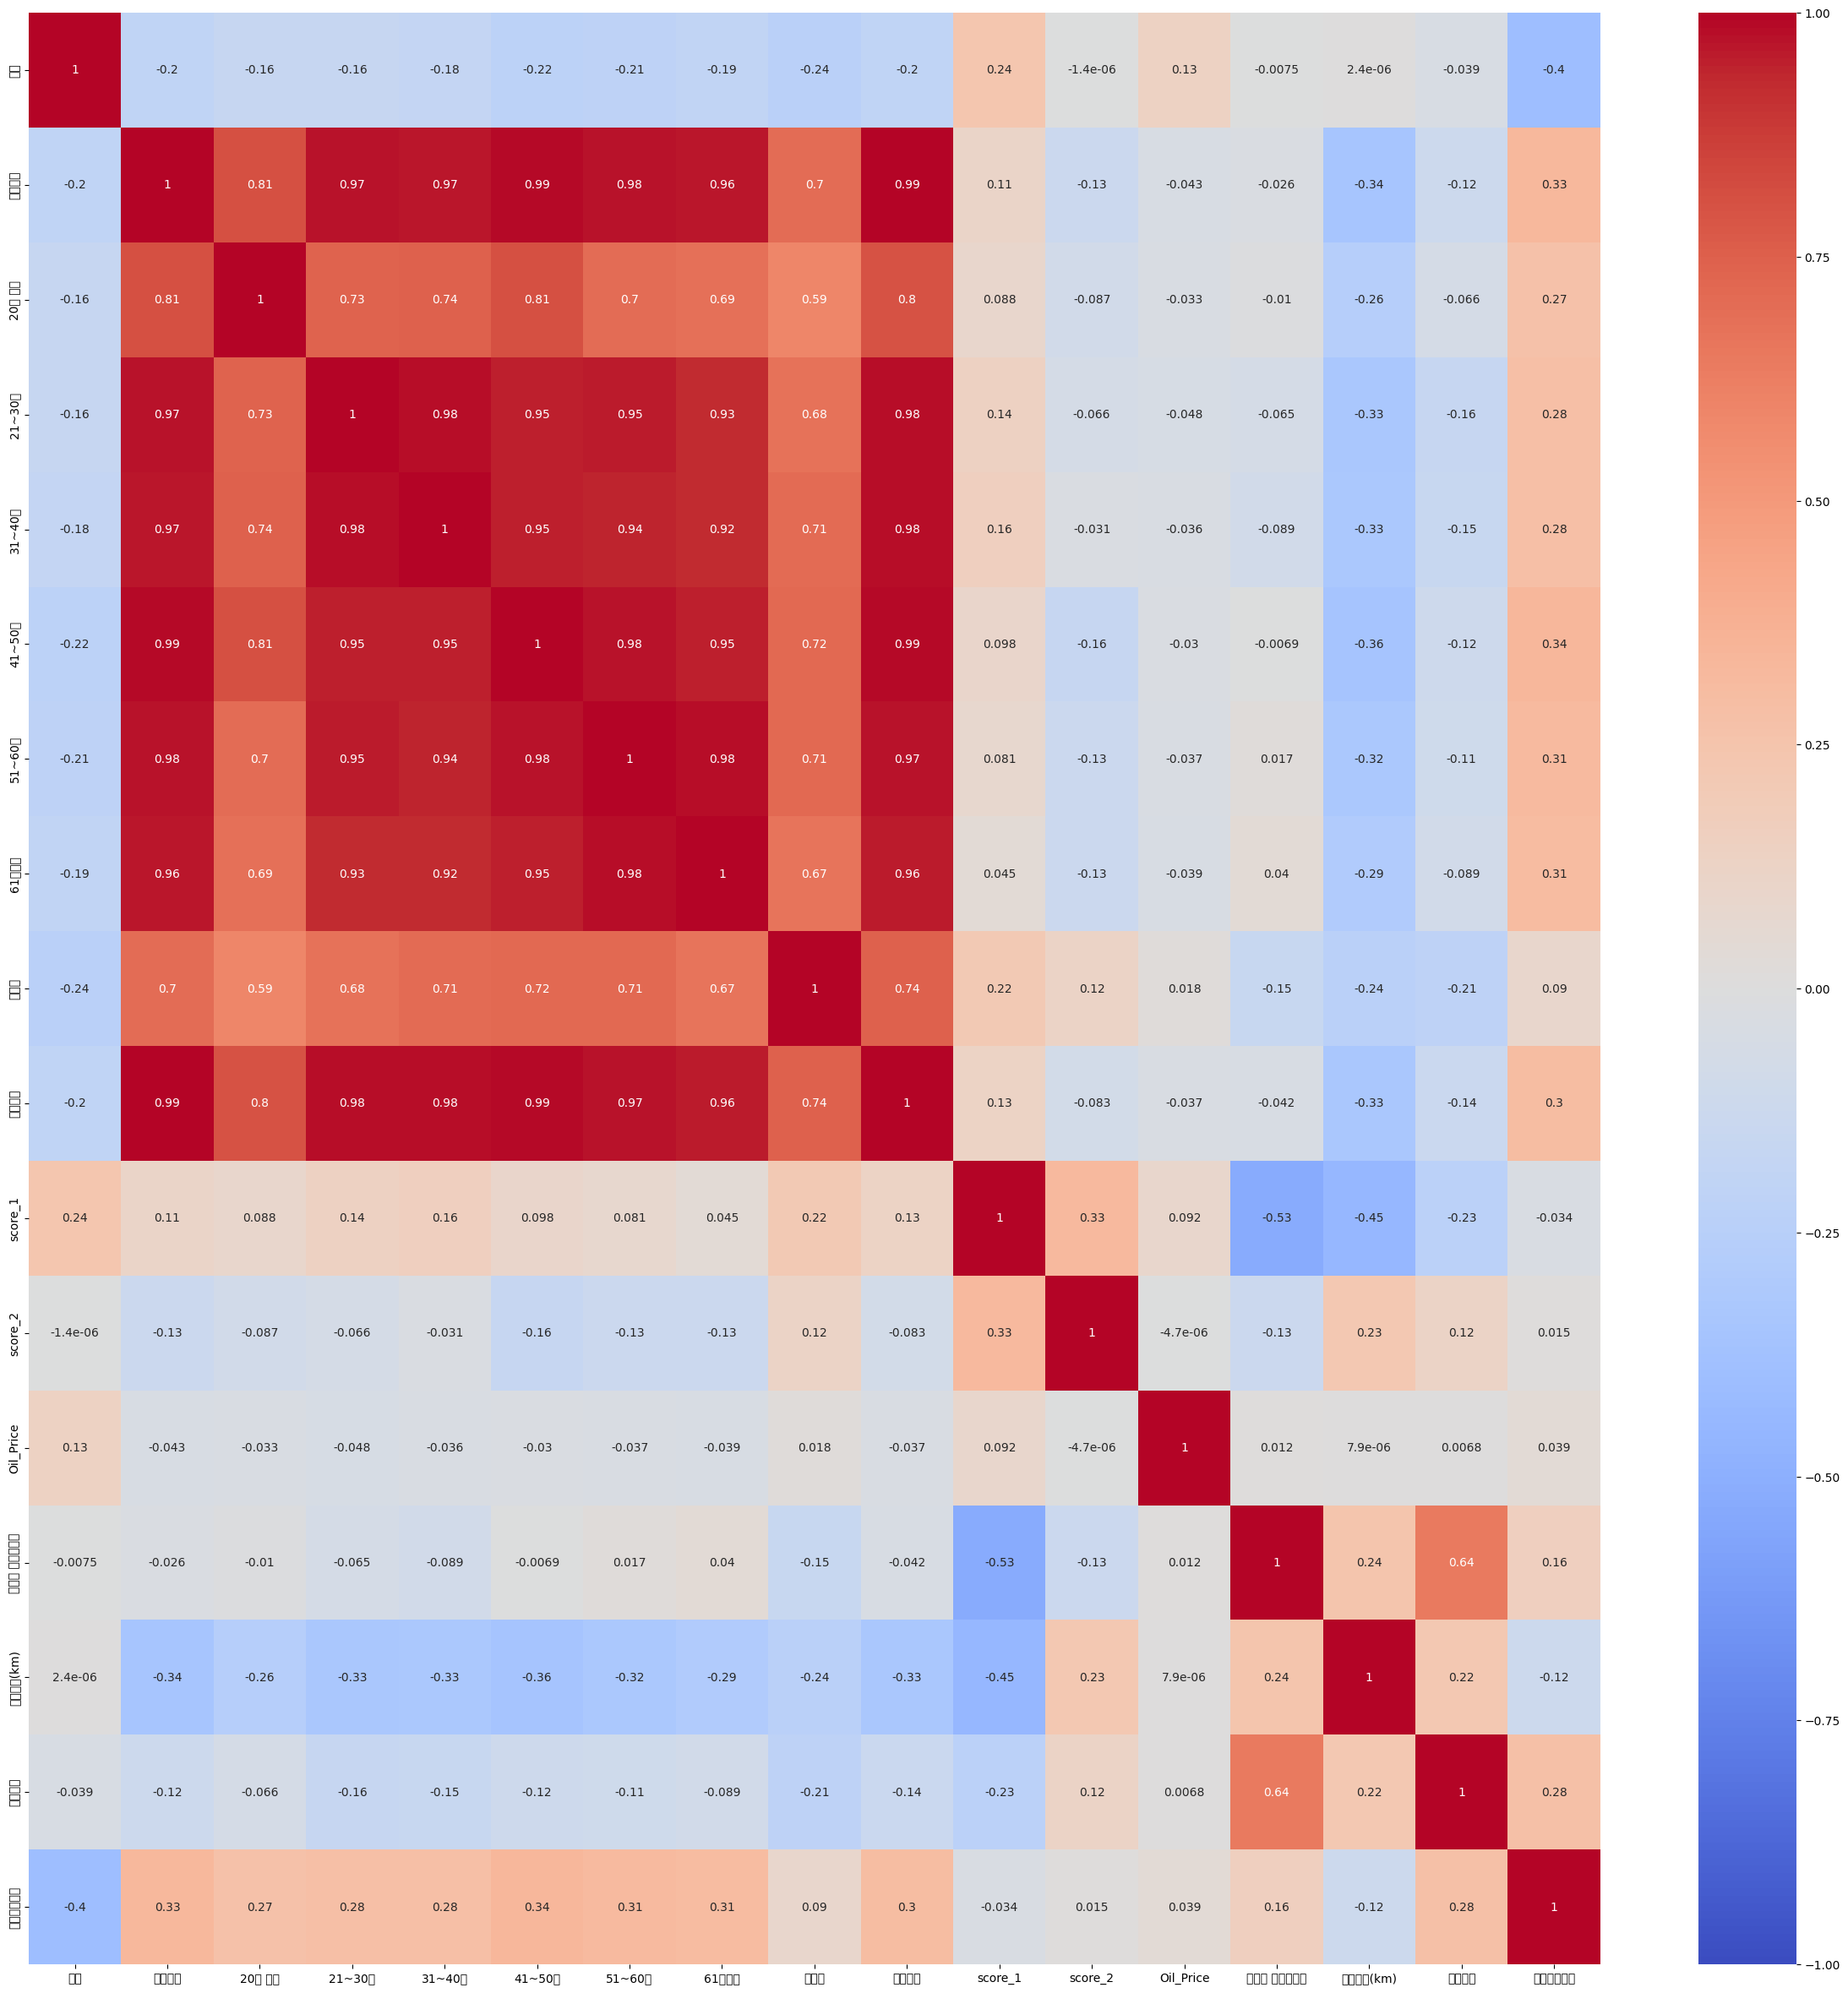

In [31]:
#상관계수확인하기 (상관계수와 피처중요도 차이 확인하려고 !)
plt.figure(figsize=(30,30))
sns.heatmap(main_df.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)

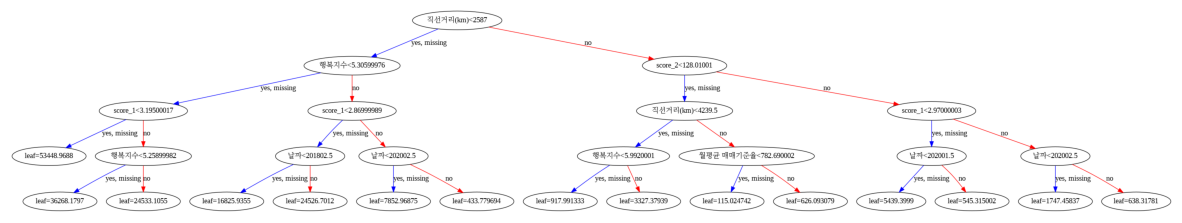

In [32]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# XGBoost 모델의 첫 번째 트리를 시각화
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(best_xgb, ax=ax, num_trees=0)
plt.show()


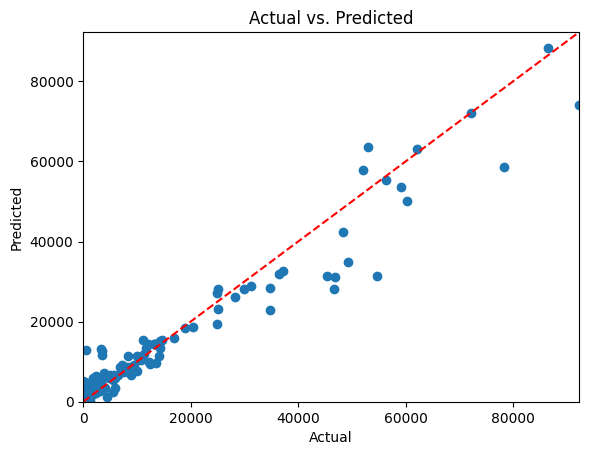

In [33]:
import matplotlib.pyplot as plt

# y_test와 y_pred를 사용하여 comparison 데이터프레임 생성
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 100,000 이하의 데이터만 필터링
comparison = comparison[comparison['Actual'] <= 100000]

# 산점도 그리기
plt.scatter(comparison['Actual'], comparison['Predicted'])
plt.plot([0, max(comparison['Actual'])], [0, max(comparison['Actual'])], 'r--')
plt.xlim(0, max(comparison['Actual']))
plt.ylim(0, max(comparison['Actual']))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
